In [1]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import Adam
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\Administrator\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
df = pd.read_csv('wine_quality_white.csv',sep=';')
df.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6


In [3]:
df.quality.value_counts().sort_index()

3      20
4     163
5    1457
6    2198
7     880
8     175
9       5
Name: quality, dtype: int64

In [4]:
df['rating'] = pd.qcut(df.quality,[0,0.4,1.0],labels=['bad','good'],retbins=False)

In [5]:
df.rating.value_counts()

bad     3838
good    1060
Name: rating, dtype: int64

In [6]:
features = df.drop(['quality','rating'],axis=1)
target = df['rating']

In [7]:
target.head(3)

0    bad
1    bad
2    bad
Name: rating, dtype: category
Categories (2, object): [bad < good]

In [8]:
df1 = pd.get_dummies(df)
df1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,rating_bad,rating_good
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1,0


In [9]:
target = pd.get_dummies(target)
target.head()

,bad,good
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [10]:
X = features.values
Y = target.values

In [11]:
X.shape

(4898, 11)

In [12]:
model = Sequential()
model.add(Dense(2,input_shape=(11,)))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

hist = model.fit(X,Y,epochs=100,verbose=1)

Epoch 1/100
4898/4898 [==============================] - 1s 194us/step - loss: 12.5921 - acc: 0.2166
Epoch 2/100
4898/4898 [==============================] - 0s 96us/step - loss: 10.4639 - acc: 0.3036
Epoch 3/100
4898/4898 [==============================] - 0s 91us/step - loss: 1.7762 - acc: 0.6895
Epoch 4/100
4898/4898 [==============================] - 0s 88us/step - loss: 1.2662 - acc: 0.6911
Epoch 5/100
4898/4898 [==============================] - 0s 90us/step - loss: 0.8798 - acc: 0.7209
Epoch 6/100
4898/4898 [==============================] - 0s 86us/step - loss: 0.6188 - acc: 0.7558
Epoch 7/100
4898/4898 [==============================] - 0s 87us/step - loss: 0.5197 - acc: 0.7775
Epoch 8/100
4898/4898 [==============================] - 0s 94us/step - loss: 0.4964 - acc: 0.7840
Epoch 9/100
4898/4898 [==============================] - 0s 92us/step - loss: 0.4888 - acc: 0.7838
Epoch 10/100
4898/4898 [==============================] - 0s 87us/step - loss: 0.4861 - acc: 0.7836
Epoch 

4898/4898 [==============================] - 0s 93us/step - loss: 0.4486 - acc: 0.7979
Epoch 83/100
4898/4898 [==============================] - 0s 85us/step - loss: 0.4501 - acc: 0.7969
Epoch 84/100
4898/4898 [==============================] - 0s 87us/step - loss: 0.4501 - acc: 0.7930
Epoch 85/100
4898/4898 [==============================] - 0s 84us/step - loss: 0.4488 - acc: 0.7920
Epoch 86/100
4898/4898 [==============================] - 0s 89us/step - loss: 0.4494 - acc: 0.7946
Epoch 87/100
4898/4898 [==============================] - 0s 85us/step - loss: 0.4500 - acc: 0.7971
Epoch 88/100
4898/4898 [==============================] - 0s 85us/step - loss: 0.4500 - acc: 0.7960
Epoch 89/100
4898/4898 [==============================] - 0s 93us/step - loss: 0.4475 - acc: 0.7950
Epoch 90/100
4898/4898 [==============================] - 0s 88us/step - loss: 0.4506 - acc: 0.7973
Epoch 91/100
4898/4898 [==============================] - 0s 86us/step - loss: 0.4553 - acc: 0.7905
Epoch 92/100


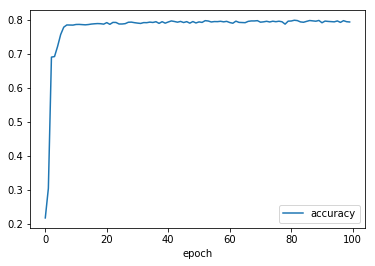

In [13]:
accuracy = pd.DataFrame()
accuracy['epoch'] = hist.epoch
accuracy['accuracy'] = hist.history['acc']
accuracy.plot.line(x='epoch',y='accuracy')

In [14]:
Y.sum(axis = 0)

array([3838, 1060], dtype=uint32)

In [15]:
3838/(3838+1060)

0.7835851367905268